In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
X = X[y != 2]
y = y[y != 2]
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import l1_min_c

cs = l1_min_c(X, y, loss="log") * np.logspace(0, 1, 16)

In [8]:
clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        penalty='l1',
        solver="liblinear",
        tol=1e-6,
        max_iter=int(1e6),
        warm_start=True,
        fit_intercept=False,
    ),
)
coefs_ = []
for c in cs:
    clf.set_params(logisticregression__C=c)
    clf.fit(X, y)
    coefs_.append(clf["logisticregression"].coef_.ravel().copy())

coefs_ = np.array(coefs_)

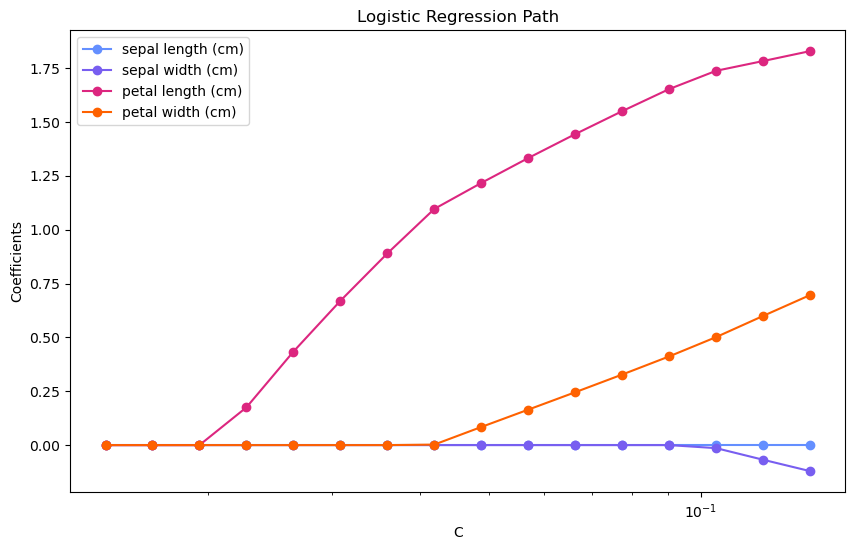

In [10]:
import matplotlib.pyplot as plt

# Colorblind-friendly palette (IBM Color Blind Safe palette)
colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100"]

plt.figure(figsize=(10, 6))
for i in range(coefs_.shape[1]):
    plt.semilogx(cs, coefs_[:, i], marker="o", color=colors[i], label=feature_names[i])

ymin, ymax = plt.ylim()
plt.xlabel("C")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.legend()
plt.axis("tight")
plt.show()

# Preguntas: 
1. ¿Qué observas en la trayectoria de regularización cuando aumentas la fuerza de regularización?
Cuando aumentas la fuerza de regularización, los coeficientes se encogen progresivamente hacia cero. Con L1, los coeficientes llegan exactamente a cero de forma abrupta, eliminando características del modelo

2. ¿Cómo afectan los diferentes niveles de regularización a los coeficientes del modelo?
La regularización alta produce coeficientes pequeños o nulos, permitiendo que solo las características más importantes contribuyan al modelo, lo que resulta en un modelo más simple e interpretable pero con riesgo de underfitting. La regularización baja genera coeficientes grandes donde todas las características contribuyen significativamente, aumentando la complejidad del modelo y el riesgo de overfitting. 

3. ¿Qué patrones de cambio en los coeficientes puedes identificar?
Se observa una activación secuencial donde las características se "encienden" una por una a medida que C aumenta, primero las más importantes y luego las menos relevantes, creando una trayectoria escalonada. Los coeficientes eventualmente se estabilizan cuando C es suficientemente grande, y las características correlacionadas tienden a mostrar patrones similares en sus trayectorias. 

4. ¿Cómo podrías utilizar la trayectoria de regularización para seleccionar la fuerza de
regularización óptima?
La estrategia más confiable es usar validación cruzada para elegir el C que maximiza el score de validación. También puedes aplicar la regla del codo buscando el punto donde la mejora en test accuracy se estabiliza, o seleccionar el C donde la brecha entre train y test score es mínima, indicando buena generalización.

5. ¿Qué impacto tiene la regularización en la capacidad del modelo para generalizar?
La regularización mejora la generalización al reducir el overfitting y evitar que el modelo memorice el ruido del conjunto de entrenamiento, resultando en predicciones más estables y robustas ante nuevos datos. Sin embargo, una regularización excesiva causa underfitting, donde el modelo se vuelve demasiado simple y pierde la capacidad de capturar relaciones genuinas en los datos. El punto óptimo de regularización representa un balance entre sesgo y varianza, y se encuentra donde el test score es máximo y la diferencia entre train y test accuracy es pequeña. 
